### SQL Cheat Sheet

---

#### **SELECT, FROM**
**Syntax:**  
```sql
SELECT column1, column2 FROM table;
```
**Example:**
```sql
SELECT * FROM players;
SELECT name, dob FROM players;
SELECT DISTINCT team_id FROM players;
SELECT COUNT(*) FROM players;
SELECT COUNT(DISTINCT team_id) FROM players;
SELECT name AS player_name, dob FROM players;
SELECT name player_name, dob FROM players;
```

---

#### **WHERE**
**Syntax:**
```sql
SELECT column1 FROM table WHERE condition;
```
**Example:**
```sql
SELECT name, dob FROM players WHERE dob > '2003-01-01';
SELECT name, team_id FROM players WHERE team_id = 'T0001';
SELECT name, team_id FROM players WHERE team_id IN ('T0001', 'T0002');
SELECT name, dob FROM players WHERE dob BETWEEN '2000-01-01' AND '2003-01-01';
SELECT name FROM players WHERE name LIKE 'J%';
SELECT name FROM players WHERE name LIKE '_a%';
SELECT name, team_id FROM players WHERE name LIKE 'J%' AND team_id = 'T0005';
```

---

#### **ORDER BY**
**Syntax:**  
```sql
SELECT column1 FROM table ORDER BY column1 [ASC|DESC];
```
**Example:**
```sql
SELECT name, dob FROM players ORDER BY name DESC;
SELECT name, team_id FROM players ORDER BY team_id, name;
SELECT name, team_id FROM players ORDER BY team_id DESC, name;
```

---

#### **LIMIT**
**Syntax:**  
```sql
SELECT column1 FROM table LIMIT number;
```
**Example:**  
```sql
SELECT name, dob FROM players LIMIT 5;
SELECT name, dob FROM players ORDER BY dob DESC LIMIT 10;
```

---

#### **GROUP BY**
**Syntax:**
```sql
SELECT column1, aggregate_function(column2) FROM table GROUP BY column1;
```
**Example:**  
```sql
SELECT team_id FROM players GROUP BY team_id;
SELECT team_id FROM players GROUP BY team_id ORDER BY team_id;
SELECT team_id, COUNT(team_id) FROM players GROUP BY team_id ORDER BY team_id;
SELECT host_team_score, COUNT(host_team_score) FROM matches GROUP BY host_team_score;
```

---

#### **HAVING**
**Syntax:**  
```sql
SELECT column1, aggregate_function(column2) FROM table GROUP BY column1 HAVING condition;
```
**Example:**  
```sql
SELECT host_team_score, COUNT(host_team_score) FROM matches
GROUP BY host_team_score HAVING COUNT(host_team_score) >= 3;
```

---

#### **UNION**
**Syntax:**  
```sql
SELECT column1 FROM table1
UNION
SELECT column1 FROM table2;
```
**Example:**  
```sql
SELECT name FROM players;
UNION
SELECT name FROM managers
```

---

#### **INTERSECT**
**Syntax:**  
```sql
SELECT column1 FROM table1
INTERSECT
SELECT column1 FROM table2;
```
**Example:**  
```sql
SELECT name FROM players
INTERSECT
SELECT name FROM managers;

SELECT * FROM players WHERE dob > '2004-01-01'
INTERSECT
SELECT * FROM players WHERE team_id = 'T0001'
```

---

#### **EXCEPT**
**Syntax:**  
```sql
SELECT column1 FROM table1
EXCEPT
SELECT column1 FROM table2;
```
**Example:**  
```sql
SELECT * FROM players WHERE dob > '2004-01-01'
EXCEPT
SELECT * FROM players WHERE name LIKE 'A%' OR name LIKE 'S%';
```

#### **JOINs**

https://en.wikipedia.org/wiki/Join_(SQL)

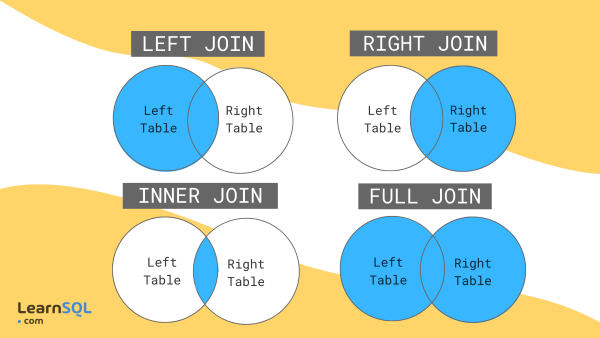

**Overview:**  
JOINs are used to combine rows from two or more tables based on a related column between them.

---

##### **INNER JOIN**
**Syntax:**  
```sql
SELECT column1, column2 
FROM table1 
INNER JOIN table2 
ON table1.common_column = table2.common_column;
```
**Example:**  
```sql
SELECT
  members.member_no,
  students.student_fname,
  students.student_lname
FROM
  members
  INNER JOIN students ON members.roll_no = students.roll_no;

SELECT
  members.member_no,
  students.student_fname,
  students.student_lname
FROM
  members
  INNER JOIN students USING (roll_no);

SELECT
  members.member_no,
  students.student_fname,
  students.student_lname
FROM
  members
  NATURAL JOIN students;

SELECT
  book_issue.member_no,
  book_catalogue.title,
  book_issue.doi
FROM
  book_issue
  INNER JOIN book_copies ON book_issue.accession_no = book_copies.accession_no
  INNER JOIN book_catalogue ON book_copies.isbn_no = book_catalogue.isbn_no;
```

---

##### **LEFT OUTER JOIN**
**Example:**  
```sql
SELECT
  members.member_no,
  students.student_fname,
  students.student_lname
FROM
  members
  LEFT OUTER JOIN students ON members.roll_no = students.roll_no;

SELECT
  members.member_no,
  students.student_fname,
  students.student_lname
FROM
  members
  LEFT JOIN students ON members.roll_no = students.roll_no;
```

---

##### **RIGHT OUTER JOIN**
**Example:**  
```sql
SELECT
  students.roll_no,
  students.student_fname,
  members.member_no
FROM
  students
  RIGHT OUTER JOIN members ON students.roll_no = members.roll_no;
```

---

##### **FULL OUTER JOIN**
**Example:**  
```sql
SELECT
  students.roll_no,
  students.student_fname,
  members.member_no
FROM
  students
  FULL OUTER JOIN members ON students.roll_no = members.roll_no;
```

### **Subqueries**

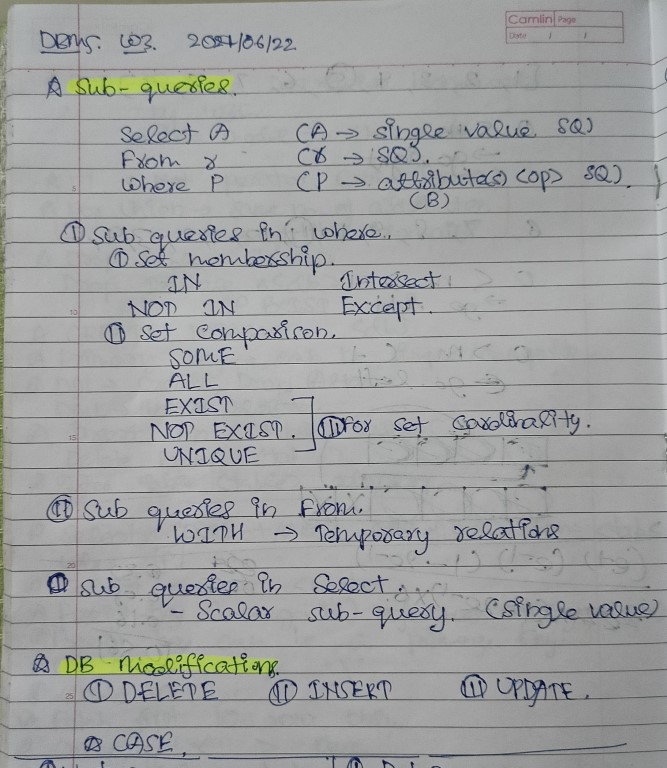

**Overview:**

A subquery is a query nested inside another query. They can be used in SELECT, FROM, and WHERE clauses.

#### **Subqueries in WHERE**

**1. Set Membership:**

**IN**
```sql
SELECT column1 
FROM table 
WHERE column1 IN (subquery);
```
**Example:**
```sql
SELECT title FROM book_catalogue
WHERE
  isbn_no IN (
    SELECT isbn_no FROM book_copies WHERE accession_no IN ('9789351199380A', '9789351197584B')
  );

SELECT title FROM book_catalogue
WHERE
  isbn_no NOT IN (
    SELECT isbn_no FROM book_copies WHERE accession_no IN ('9789351199380A', '9789351197584B')
  );
```

**2. Set Comparison:**

**ANY/ALL**
```sql
SELECT column1 
FROM table 
WHERE column1 > ANY (subquery);
```
**Example:**  
```sql
SELECT member_no FROM members
WHERE
  member_no > ANY (
    SELECT member_no FROM book_issue WHERE doi = '2021-08-11'
  );

SELECT member_no FROM members
WHERE
  member_no > ALL (
    SELECT member_no FROM book_issue WHERE doi = '2021-08-11'
  );
```

**3. Existence Test:**
 
**EXISTS**
```sql
SELECT column1 
FROM table 
WHERE EXISTS (subquery);
```
**Example:**  
```sql
SELECT member_no FROM members
WHERE
  EXISTS (
    SELECT * FROM book_issue WHERE members.member_no = book_issue.member_no
  );

SELECT member_no FROM members
WHERE
  NOT EXISTS (
    SELECT * FROM book_issue WHERE members.member_no = book_issue.member_no
  );
```

---

#### **Subqueries in FROM**

**WITH (Temporary Relations)**
```sql
WITH temp_relation AS (subquery)
SELECT column1
FROM temp_relation;
```
**Example:**
```sql
WITH
  recent_issues AS (
    SELECT member_no, doi FROM book_issue WHERE doi > '2021-08-05'
  )
SELECT member_no FROM recent_issues;
```

---

#### **Subqueries in SELECT**

**Scalar Subquery (Single Value)**
```sql
SELECT column1, (subquery)
FROM table;
```
**Example:**
```sql
SELECT
  member_no,
  (
    SELECT COUNT(*) FROM book_issue WHERE book_issue.member_no = members.member_no
  ) AS issue_count
FROM
  members;
```
